 
<h1 ><center><b>Hotel Bookings Cancellation Prediction</b></center></h1>

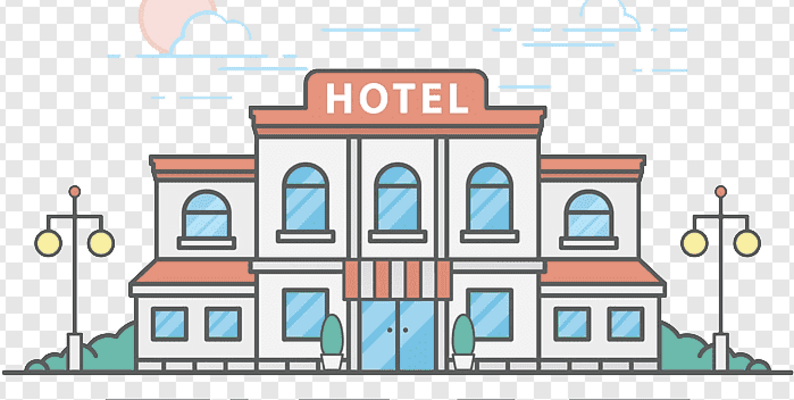

- Predicting Hotel Booking Cancellation in Portugal is a machine learning classification project that will try to predict whether a booking will be cancelled or not using machine learning models based on historical data.
- The data for this project is from Hotel Booking Demand Dataset Sciencedirect. This data was acquired by extraction from hotel’s Property management system from 2015 to 2017 from hotel in Region Algarve and Lisbon.


### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 60)

### Loading the dataset

In [2]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Shape of the dataset

In [3]:
df.shape

(119390, 32)

In [4]:
# There are 119390 rows and 32 columns present in the dataset 

### Columns of the dataset

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Basic information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# Object columns = hotel, arrival_date_month, meal, country, market_segment, distribution_channel, reserved_room_type, 
#                  assigned_room_type, deposit_type, customer_type, reservation_status, reservation_status_date.

# Numeric columns = is_canceled, lead_time, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, 
#                   stays_in_weekend_nights, stays_in_week_night, adults, children, babies, is_repeated_guest, 
#                   previous_cancellations, previous_bookings_not_canceled, booking_changes, agent, company, 
#                   days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests.
    

## Number of unique values per column

In [8]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

## Statistical Summary

In [9]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
df.describe(include = "object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


## Exploratory Data Analysis

### Checking for duplicate records

In [11]:
df.duplicated().sum()

31994

In [12]:
# There are 31994 duplicate records and it is better to get rid of them.

### Checking for null values

In [13]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
# Null values are present in 4 columns : children, country, agent, and company

### Percentage of null values

In [15]:
df.isna().sum()/len(df) * 100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [16]:
# As 94% of the values in company column are missing. Therefore, it is better to drop that column.
# Other columns have sufficiently less number of missing values and hence, can be imputed through appropriate values.

# Univariate Analysis

### Booking cancellation rate

In [17]:
rate = len(df[df['is_canceled']==1]) / len(df) * 100
print(f"Booking cancellation rate = {round(rate,2)} %")

Booking cancellation rate = 37.04 %


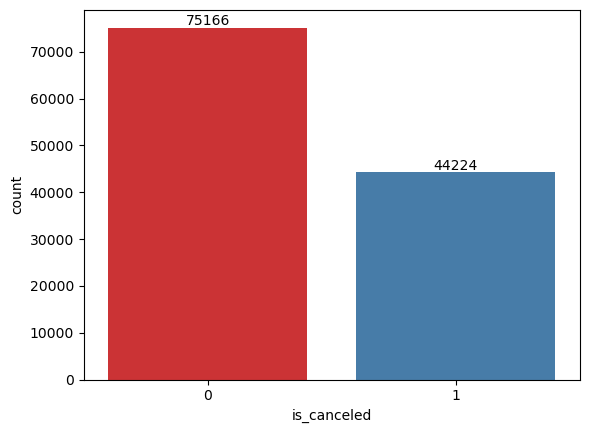

In [18]:
ax=sns.countplot(x = 'is_canceled', data = df, palette = 'Set1')

for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [19]:
#Out of 119390 bookings, 44224 (37.04%) bookings have been canceled.

### Analysis of each feature

In [20]:
obj_col_list = list(df[["hotel", "meal","market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type", "reservation_status"]])

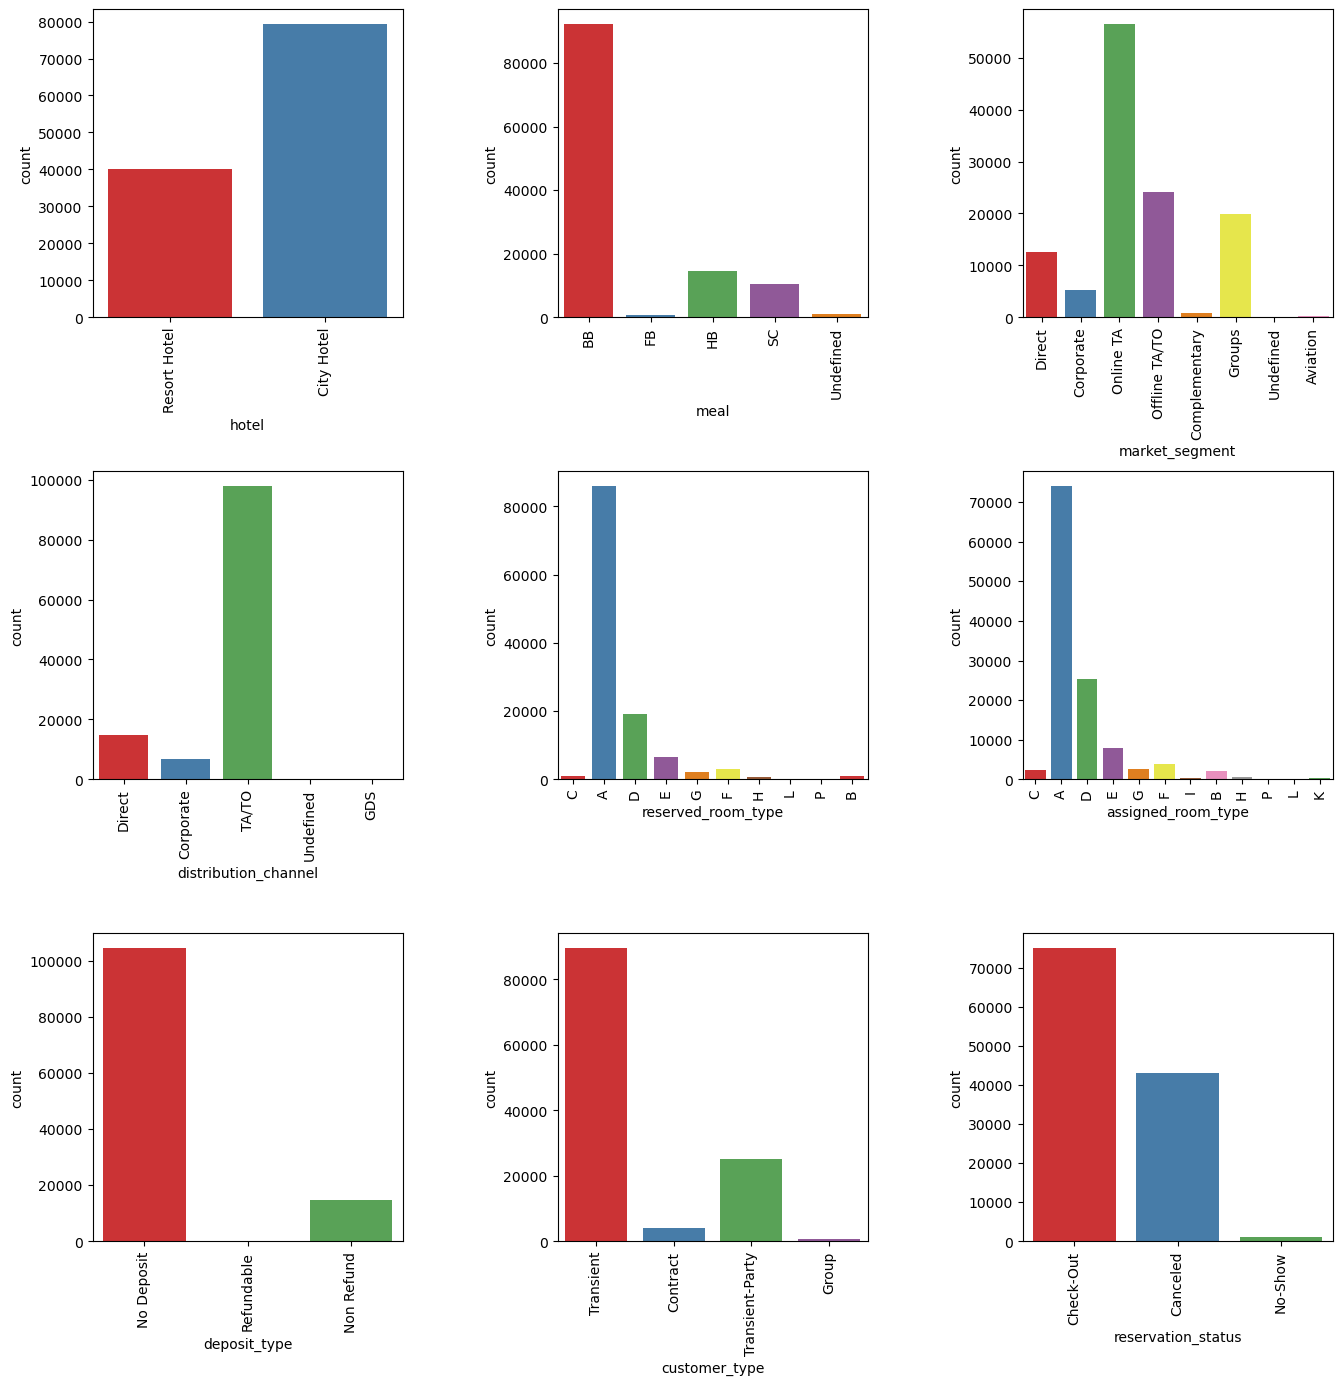

In [21]:
plt.figure(figsize = (16,16))
plt.subplots_adjust(hspace = 0.50, wspace = 0.50)

for i in range(len(obj_col_list)):
    plt.subplot(3,3,i+1)
    plt.xticks(rotation=90)
    sns.countplot(df[obj_col_list[i]], palette = 'Set1')
    
plt.show()

Analysis:
1. The number of bookings in City Hotel are more than the number of bookings in Resort Hotel.
2. Most of the customers prefer 'BB' type of meal.
3. Maximum number of bookings have been done through 'online TA' market segment as well as 'TA/TO' distribution channel.
4. The most number of bookings have been made for 'A' room_type , followed by 'D' room type. Same pattern can also be seen while assigning room type to the customers.
5. Most of the customers prefer to book rooms without any deposit.
6. Maximum number of bookings have been done by Transient customers, followed by Transient party type. There are very few bookings made by Groups.
7. A very few number of customers did not show up after booking their rooms.

In [22]:
num_col_list = list(df[["arrival_date_year", "adults", "children", "babies", "is_repeated_guest", "previous_cancellations", "booking_changes","required_car_parking_spaces","total_of_special_requests"]])

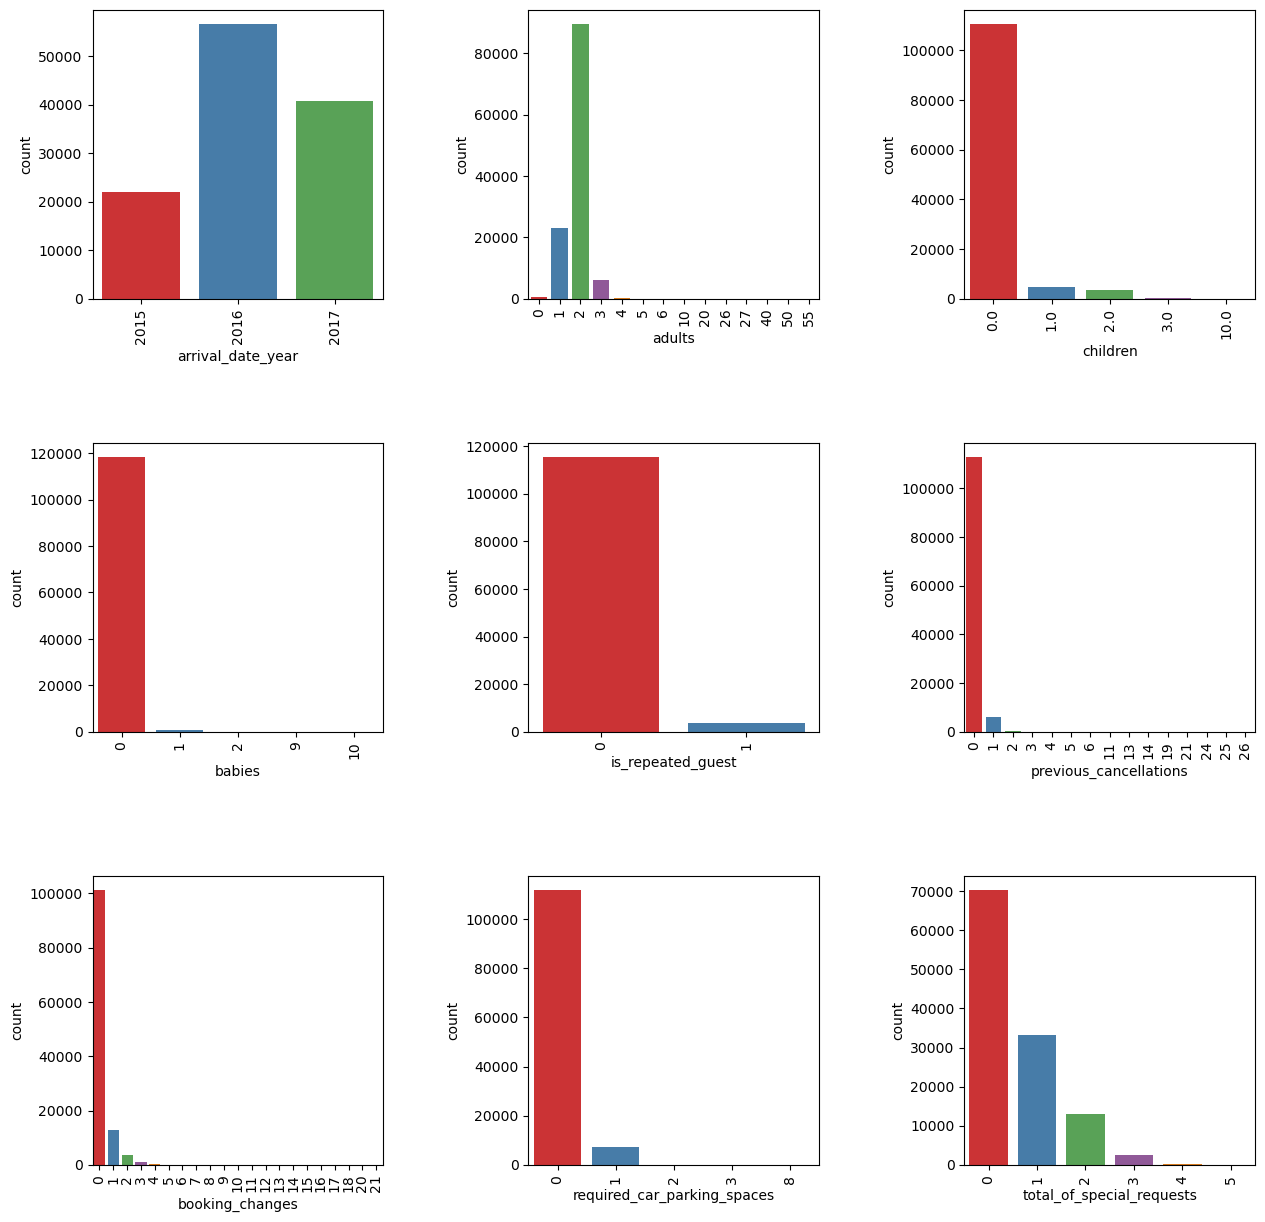

In [23]:
plt.figure(figsize = (15,15))
plt.subplots_adjust(hspace = 0.50, wspace = 0.50)

for i in range(len(num_col_list)):
    plt.subplot(3,3,i+1)
    plt.xticks(rotation=90)
    sns.countplot(df[num_col_list[i]], palette = 'Set1')
    
plt.show()

Analysis:
1. Maximum number of bookings have been done in 2016, followed by 2017.
2. Maximum number of bookings have been done by adults, probably couples having no child.
3. There are very few number of repeated customers. Most of them are new comers. 
4. Most of the customers have not done any previous cancellations and booking changes. Very few have done booking changes and previous cancellations only once. 
5. Most of the customers do not require car parking space.
6. Similarly, most of the customers have not made any special requests, followed by 1 or 2 special request.


### Monthly analysis

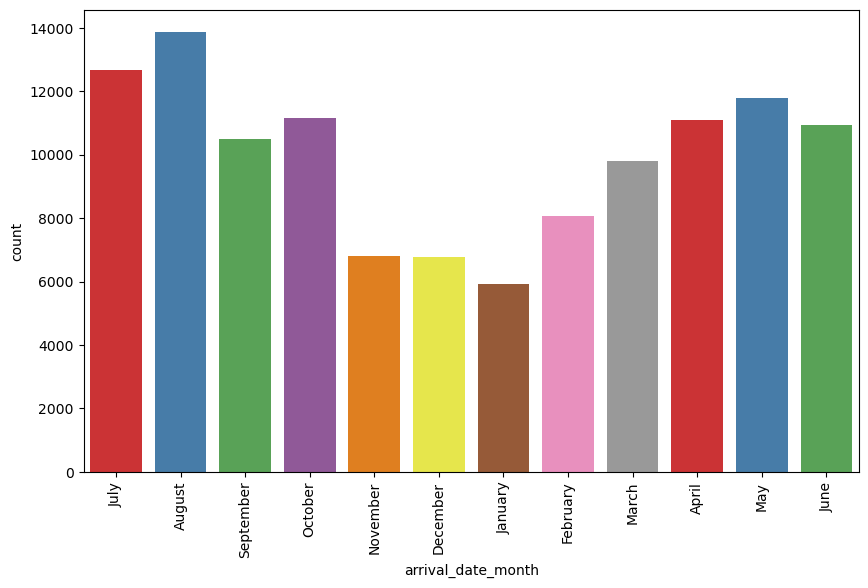

In [24]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(data = df, x = "arrival_date_month", palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

In [25]:
# Maximum bookings have been done in the months of August, followed by the months from April to July.

# Bivariate analysis

### Booking cancellation as per Hotel type

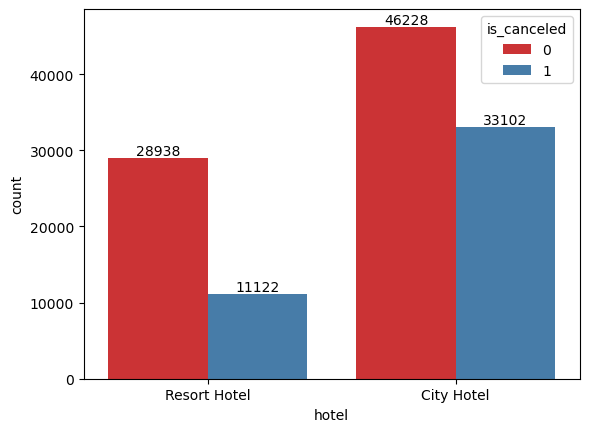

In [26]:
ax = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'Set1')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [27]:
# As more number of bookings have been don in City Hotel, more number of cancellations have also been done there.

### Booking cancellation as per customer_type

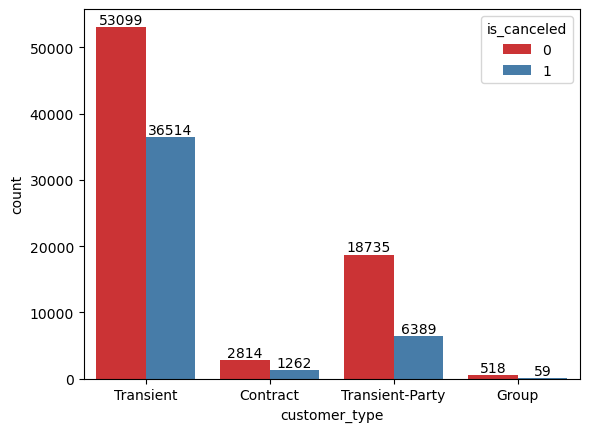

In [28]:
ax = sns.countplot(x = 'customer_type', hue = 'is_canceled', data = df,palette = 'Set1')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [29]:
# Maximum cancellations have been done by Transient, followed by Transient party type.

### Booking cancellation as per arrival_date_year

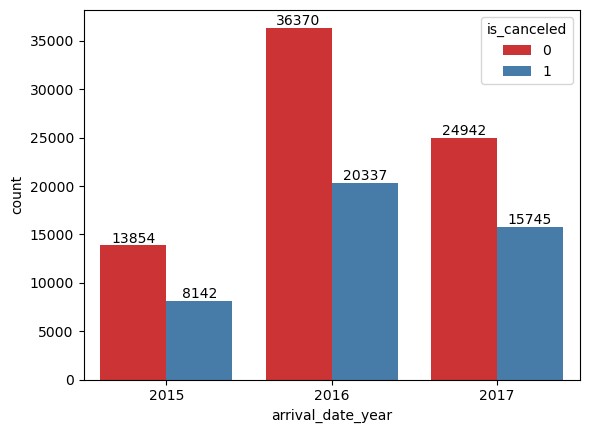

In [30]:
ax = sns.countplot(x = 'arrival_date_year', hue = 'is_canceled', data = df, palette = 'Set1')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [31]:
# Maximum cancellations have been done in 2016, followed by 2017.

### Booking cancellation as per arrival_date_month

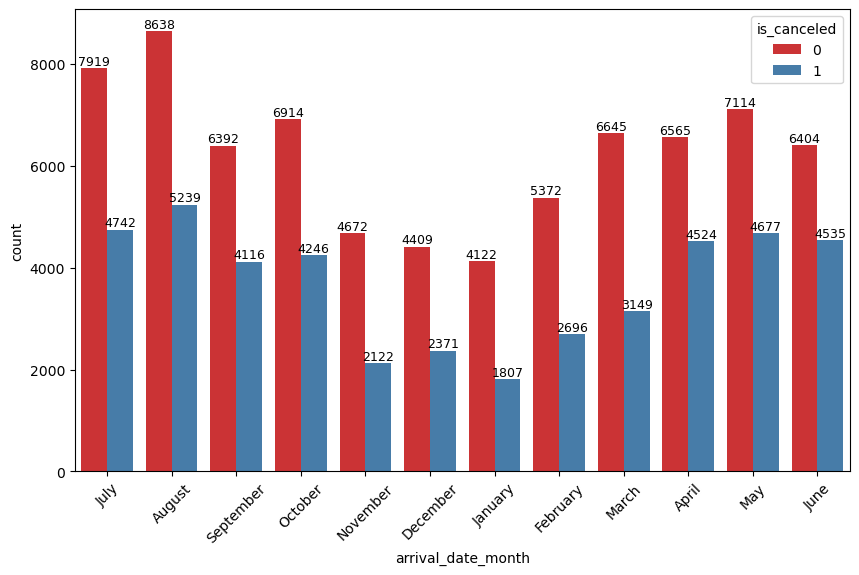

In [32]:
plt.figure(figsize=(10,6),dpi=100)
ax = sns.countplot(x = 'arrival_date_month', hue = 'is_canceled', data = df, palette = 'Set1')
for i in ax.containers:
    ax.bar_label(i, size = 9)
plt.xticks(rotation = 45)
plt.show()

In [33]:
# Maximum cancellations have been done in August, followed by months from April to July.

### Booking cancellation as per guests_type

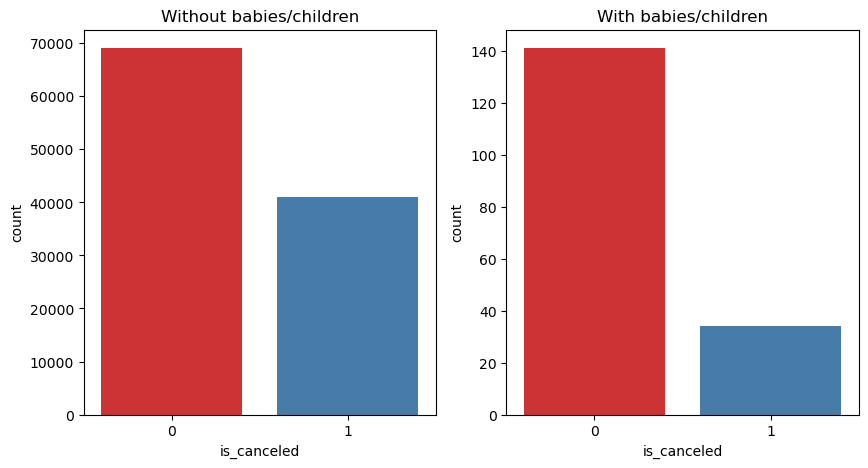

In [34]:
no_family = df.loc[(df['children'] == 0) & (df['babies'] == 0)]

fig,axes =  plt.subplots(1, 2, figsize =(10,5))
sns.countplot(ax=axes[0], data = no_family, x = "is_canceled", palette = 'Set1')
axes[0].set_title("Without babies/children")



family = df.loc[(df['children'] != 0) & (df['babies'] != 0)]

sns.countplot(ax=axes[1], data = family, x = "is_canceled", palette = 'Set1')
axes[1].set_title("With babies/children")
plt.show()

In [35]:
# People who do not have any child have canceled the bookings more number of times.

### Booking cancellation according to waiting_period

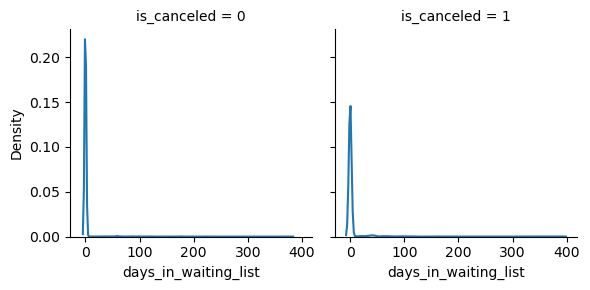

In [36]:
days = sns.FacetGrid(df, col="is_canceled")
days.map(sns.kdeplot, "days_in_waiting_list")
plt.show()


In [37]:
# There is no impact of waiting period on booking cancellation.

### Booking cancellation according to deposit_type

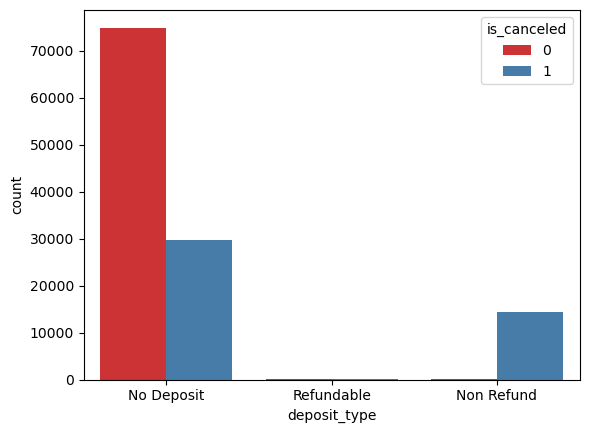

In [38]:
sns.countplot(data = df, x ="deposit_type", hue = "is_canceled", palette = 'Set1')
plt.show()

In [39]:
# Maximum number of bookings have been cancelled by people with no deposit.

### Booking cancellation as per previous_cancellations

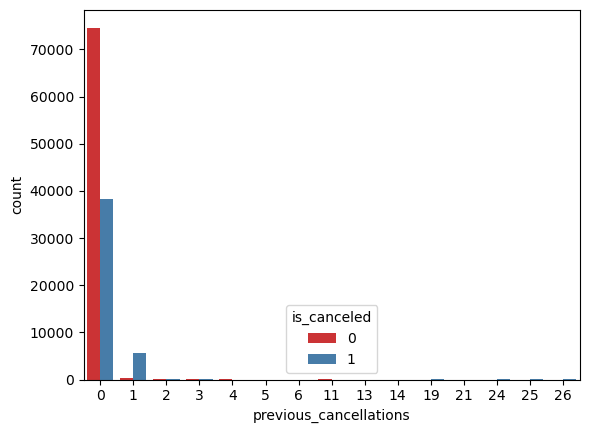

In [40]:
sns.countplot(data = df, x ="previous_cancellations", hue = "is_canceled", palette = 'Set1')
plt.show()

### Booking cancellation as per lead_time

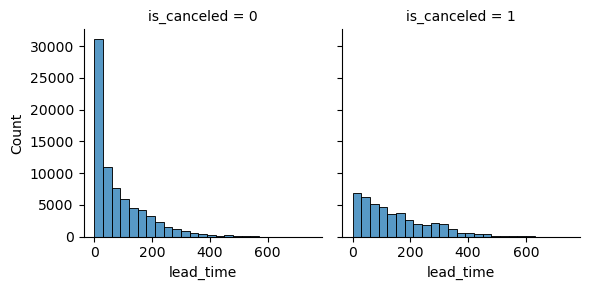

In [41]:
g = sns.FacetGrid(df, col="is_canceled")
g.map(sns.histplot, "lead_time", binwidth = 30)
plt.show()

In [42]:
# Longer the lead_time, lower is the cancelation rate.

### Booking cancellation as per is_repeated_guest

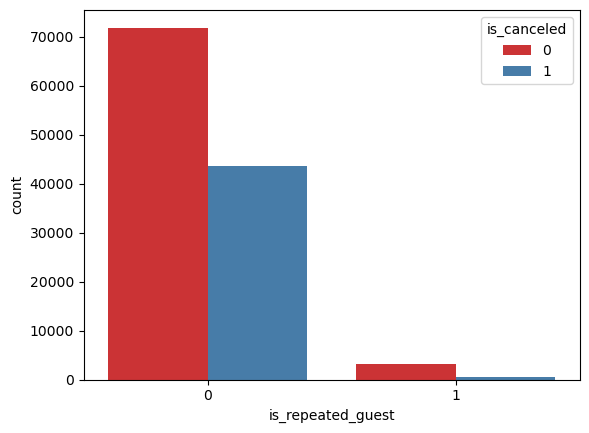

In [43]:
sns.countplot(data = df, x ="is_repeated_guest", hue = "is_canceled", palette = 'Set1')
plt.show()

### Booking cancellation as per booking_changes

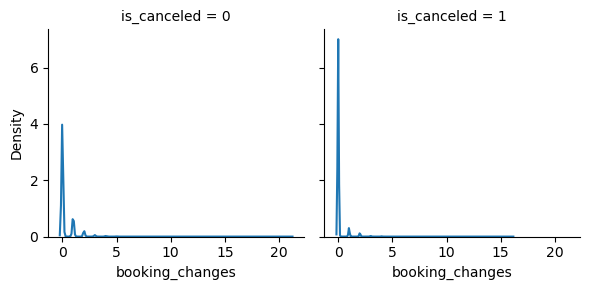

In [44]:
g = sns.FacetGrid(df, col="is_canceled")
g.map(sns.kdeplot, "booking_changes")
plt.show()

In [45]:
# No relation between booking changes and its cancellation rate.

### Booking cancellation as per stay in weekend or week nights

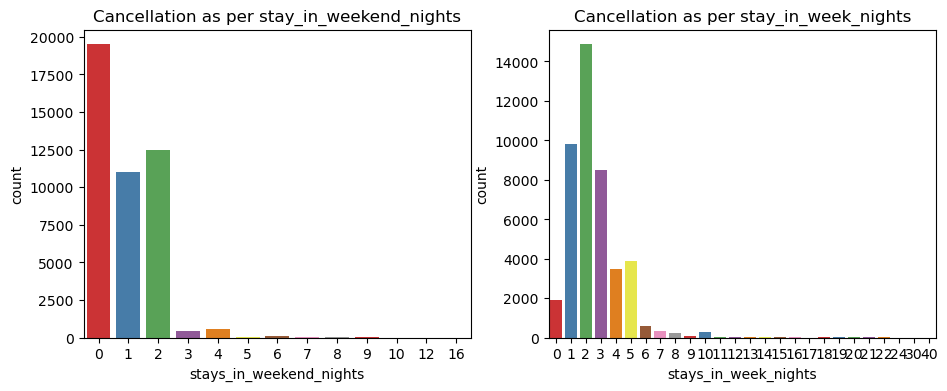

In [46]:
canceled = df[df.is_canceled == 1]
fig,axes =  plt.subplots(1, 2, figsize =(11,4))

# weekend nights
sns.countplot(ax=axes[0], data = canceled, x ="stays_in_weekend_nights", palette = 'Set1')
axes[0].set_title("Cancellation as per stay_in_weekend_nights")

# week nights
sns.countplot(ax=axes[1], data = canceled, x ="stays_in_week_nights", palette = 'Set1')
axes[1].set_title("Cancellation as per stay_in_week_nights")

plt.show()

In [47]:
#Maximum cancellations have been done for the bookings for week nights.

### Booking cancellation as per country

In [48]:
top_10 = df[df["is_canceled"] == 1]["country"].value_counts().head(10)
top_10

PRT    27519
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: country, dtype: int64

In [49]:
# Maximum cancellations have done by guests from country with code 'PRT'.

### Booking cancellation as per distribution_channel and market_segment

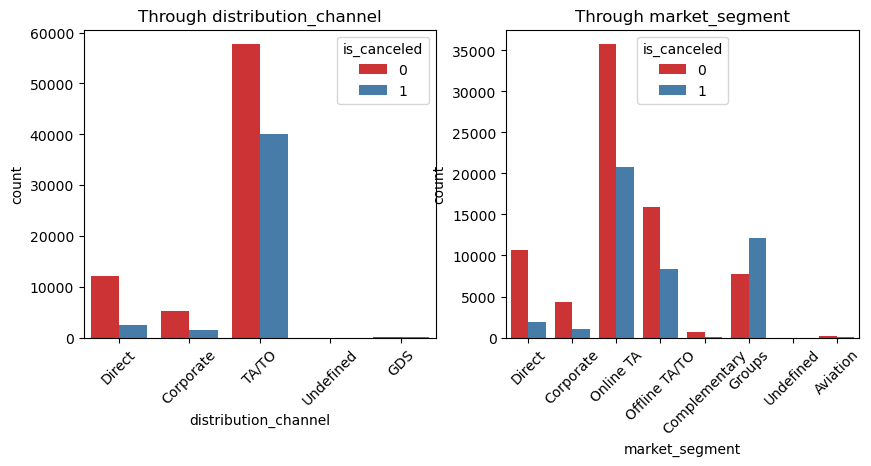

In [50]:
fig,axes =  plt.subplots(1, 2, figsize =(10,4))

sns.countplot(ax=axes[0], data = df, x ="distribution_channel", hue = "is_canceled", palette = 'Set1')
axes[0].set_title("Through distribution_channel")
axes[0].tick_params(axis='x', rotation=45)


sns.countplot(ax=axes[1], data = df, x ="market_segment", hue = "is_canceled", palette = 'Set1')
axes[1].set_title("Through market_segment")
axes[1].tick_params(axis='x', rotation=45)

plt.show()


In [51]:
# Maximum cancellations have been done through TA/TO and that too through Online TA.

### Booking cancellation as per change_in_room (reserved vs assigned)

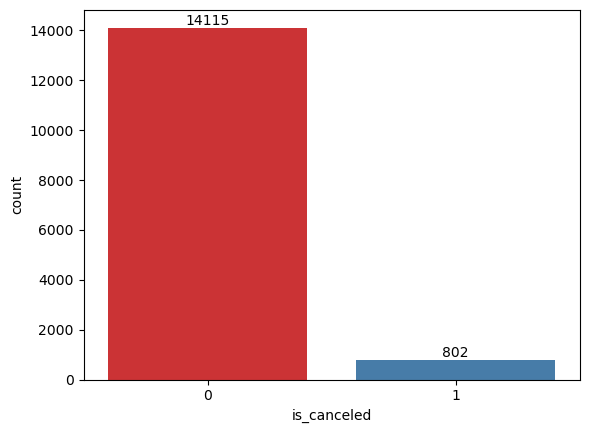

In [52]:
room_change = df.loc[df['reserved_room_type'] != df['assigned_room_type']]
ax = sns.countplot(data = room_change, x = "is_canceled", palette = 'Set1')

for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [53]:
# There are very cancellations by guests who have not been assigned room type as reserved by them.

# Multivariate Analysis

### Monthly analysis of  'average adr' as per hotel_type

In [54]:
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 
              'October':10, 'November':11, 'December':12}

resort = df[df.hotel == "Resort Hotel"]
resort_adr = resort.groupby(["arrival_date_month"])["adr"].mean().reset_index()
resort_adr = resort_adr.sort_values("arrival_date_month", key = lambda x : x.apply (lambda x : month_dict[x]))
resort_adr.set_index("arrival_date_month", inplace = True)

city = df[df.hotel == "City Hotel"]
city_adr = city.groupby(["arrival_date_month"])["adr"].mean().reset_index()
city_adr = city_adr.sort_values("arrival_date_month", key = lambda x : x.apply (lambda x : month_dict[x]))
city_adr.set_index("arrival_date_month", inplace = True)


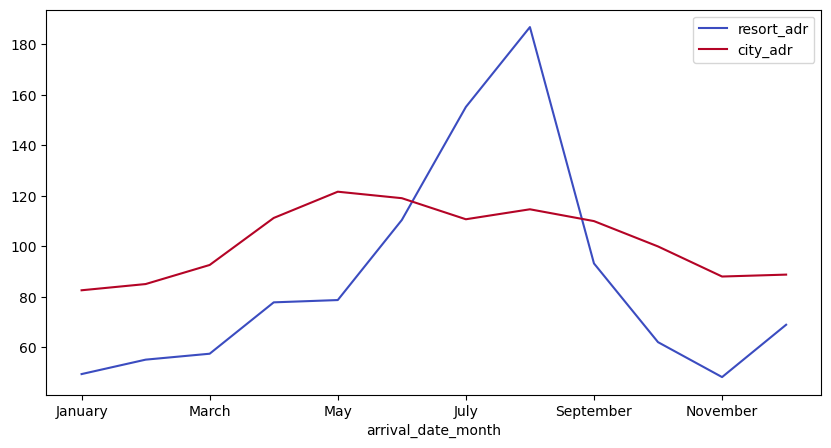

In [55]:
result = pd.concat([resort_adr, city_adr], axis=1)
result.set_axis(['resort_adr', 'city_adr'], axis='columns', inplace=True)
result.reset_index(level=0, inplace=True)

result.plot(x='arrival_date_month', figsize=(10, 5), colormap = 'coolwarm')
plt.show()


In [56]:
# On average, adr has been highest in Resort hotel in the month of August, and higher than the adr of City hotel during June-September.
# On the other hand, City hotel has highest adr in the month of May.

### Bookings as per customer_type and their special_requests.

In [57]:
df.groupby(['customer_type',"total_of_special_requests"]).size()

customer_type    total_of_special_requests
Contract         0                             2106
                 1                             1121
                 2                              711
                 3                              128
                 4                                6
                 5                                4
Group            0                              314
                 1                              177
                 2                               68
                 3                               14
                 4                                3
                 5                                1
Transient        0                            49331
                 1                            26777
                 2                            11052
                 3                             2124
                 4                              300
                 5                               29
Transient-Party  0   

### Meal preferred by customer type

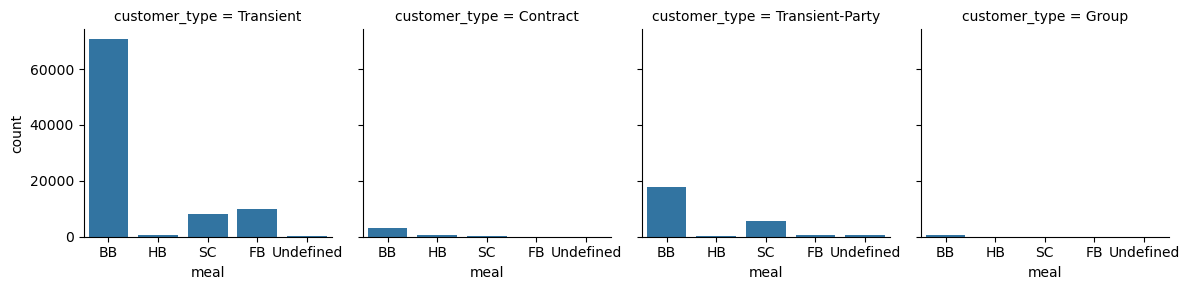

In [58]:
grid = sns.FacetGrid(df, col='customer_type')
grid.map(sns.countplot, 'meal')
plt.show()

### Correlation among features

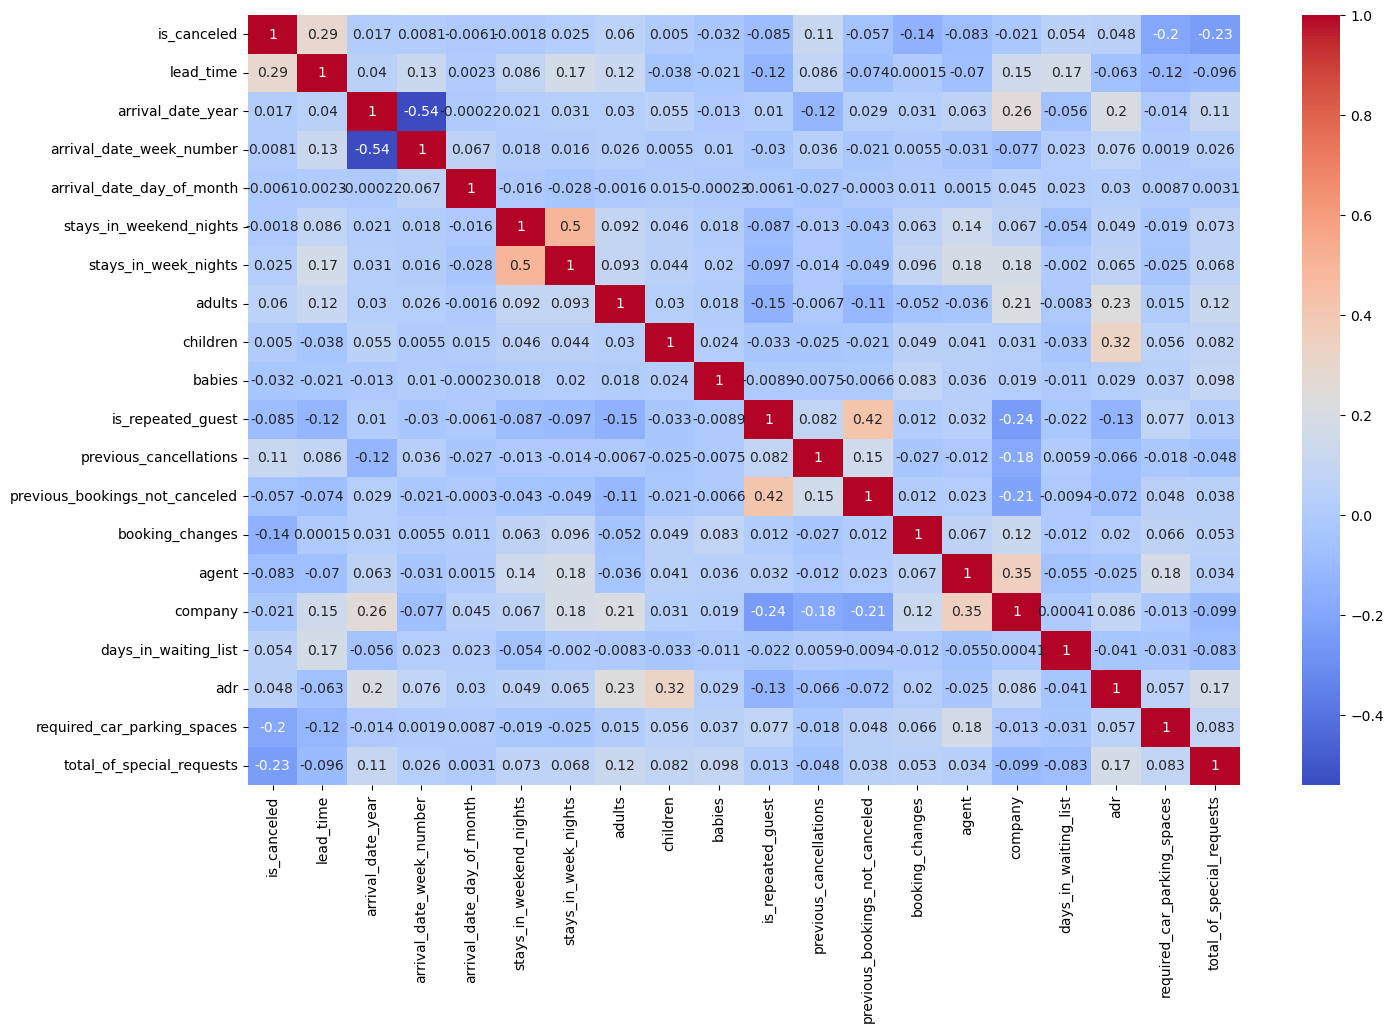

In [59]:
plt.figure(figsize=(16,10),dpi=100)
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm' )
plt.show()

### Correlation between features and booking cancellation

In [60]:
df.corr()["is_canceled"][:]

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

In [61]:
# positive = lead_time, previous_cancellations

# negative = special_requests, parking spaces, booking changes

# Data Pre-processing

## Treating Null values

In [62]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### 1. Children column

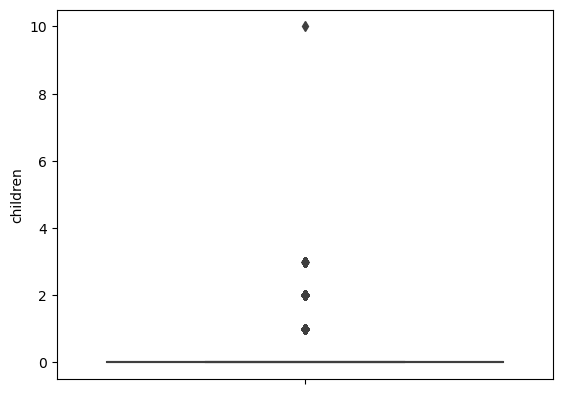

In [63]:
sns.boxplot(data = df, y = "children")
plt.show()

In [64]:
## As ouliers are present in this column, therefore, we can impute missing values with the median of this column

df["children"].fillna(df["children"].median(), inplace=True)

### 2. Country column

In [65]:
## As country column is categorical in nature, therefore, we can impute missing values with the mode of this column.

df["country"].fillna(df["country"].mode()[0], inplace=True)

### 3. Agent column

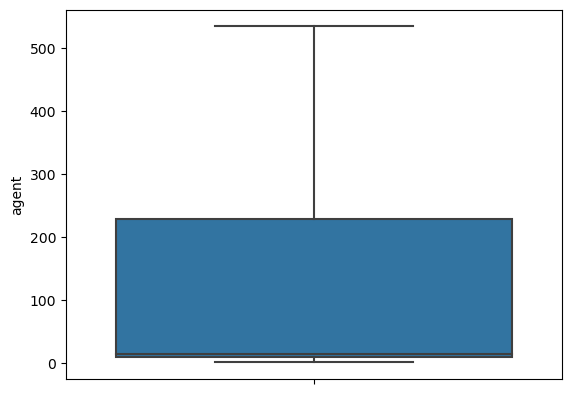

In [66]:
sns.boxplot(data = df, y = "agent")
plt.show()

In [67]:
## As no ouliers are present in this column, therefore, we can impute missing values with the mean of this column.

df["agent"].fillna(df["agent"].mean(), inplace=True)

### 4. Company column

In [68]:
## As 94% of the values in company column are missing. Therefore, it is better to drop that column.

df.drop("company", axis=1, inplace = True)

### All the null values have been successfully treated

In [69]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

## Handling Duplicate records

In [70]:
## Duplicate records will only confuse the model. Therefore, it is advisable to remove them.

df.drop_duplicates(inplace = True)

In [71]:
df.duplicated().sum()

0

## Dropping unnecessary records

### 1. Undefined rows

In [72]:
undefined_rows = df[(df["market_segment"] == "Undefined") | (df["distribution_channel"] == "Undefined")].index
df.drop(undefined_rows, axis = 0, inplace = True)

### 2. No_stay rows

In [73]:
## Includes bookings neither at week nights nor at the weekedn nights ---> Not possible

no_stays = df[(df["stays_in_weekend_nights"]==0) & (df["stays_in_week_nights"]==0)].index
df.drop(no_stays, axis = 0, inplace = True)

### 3. Zero guests

In [74]:
# Includes bookings by neither adults nor family ----> Not possible

zeros = df[(df["adults"]==0) & (df["babies"]==0) & (df["children"]==0)].index
df.drop(zeros, axis = 0, inplace = True)

## Feature Engineering

### 1. Total children

In [75]:
df["total_guests"] = df["children"].astype(int) + df["babies"] + df["adults"]

### 2. Change in room

In [76]:
# Checking whether there is difference bewtween the reserved and assigned room type.

def room_change(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

df['change_in_room'] = df.apply(room_change, axis=1)

### 3. Total stay

In [77]:
df["total_stay"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

## Converting categorical columns

### 1. arrival_date_month

In [78]:
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df.arrival_date_month = df.arrival_date_month.map(month_dict).astype(int)

### 2. arrival_date_year

In [79]:
year_dict = {2015 : 0, 2016 : 1, 2017 : 2}
df.arrival_date_year = df.arrival_date_year.map(year_dict).astype(int)

### 3. is_previously_cancelled

In [80]:
is_cancel = df[(df["previous_cancellations"] > 0)]["previous_cancellations"].index
df.loc[is_cancel, 'previous_cancellations'] = 1
df.previous_cancellations.value_counts()

0    84931
1     1677
Name: previous_cancellations, dtype: int64

### 4. is_booking_changes

In [81]:
b_changes = df[(df["booking_changes"] > 0)]["booking_changes"].index
df.loc[b_changes, 'booking_changes'] = 1
df.booking_changes.value_counts()

0    70925
1    15683
Name: booking_changes, dtype: int64

### 5. is_required_parking_space

In [82]:
is_space = df[(df["required_car_parking_spaces"] > 0)]["required_car_parking_spaces"].index
df.loc[is_space, 'required_car_parking_spaces'] = 1
df.required_car_parking_spaces.value_counts()

0    79319
1     7289
Name: required_car_parking_spaces, dtype: int64

### 6. is_special_request

In [83]:
is_request = df[(df["total_of_special_requests"] > 0)]["total_of_special_requests"].index
df.loc[is_request, 'total_of_special_requests'] = 1
df.total_of_special_requests.value_counts()

0    43415
1    43193
Name: total_of_special_requests, dtype: int64

In [84]:
df.rename(columns={"total_of_special_requests": "is_special_request", "required_car_parking_spaces": "is_required_parking_space", "booking_changes":"is_booking_changes", "previous_cancellations": "is_previously_cancelled"}, inplace=True)

### 7. Country

In [85]:
df.replace({'country' : { 'PRT' : 1, 'GBR' : 2}}, inplace = True)
other_countries = df[(df["country"] != 1) & (df["country"] != 2)]["country"].index
df.loc[other_countries, 'country'] = 0
df.country.value_counts()

0    48930
1    27278
2    10400
Name: country, dtype: int64

## Encoding

In [86]:
df = pd.get_dummies(data = df, columns = ['hotel', "arrival_date_year", "country", "deposit_type", "customer_type", 
                                          "market_segment", "change_in_room" ],drop_first=True)

In [87]:
df.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,distribution_channel,is_repeated_guest,is_previously_cancelled,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,is_booking_changes,agent,days_in_waiting_list,adr,is_required_parking_space,is_special_request,reservation_status,reservation_status_date,total_guests,total_stay,hotel_Resort Hotel,arrival_date_year_1,arrival_date_year_2,country_1,country_2,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,change_in_room_True
2,0,7,7,27,1,0,1,1,0.0,0,BB,Direct,0,0,0,A,C,0,86.693382,0,75.0,0,0,Check-Out,2015-07-02,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,0,13,7,27,1,0,1,1,0.0,0,BB,Corporate,0,0,0,A,A,0,304.000000,0,75.0,0,0,Check-Out,2015-07-02,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
4,0,14,7,27,1,0,2,2,0.0,0,BB,TA/TO,0,0,0,A,A,0,240.000000,0,98.0,0,1,Check-Out,2015-07-03,2,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
6,0,0,7,27,1,0,2,2,0.0,0,BB,Direct,0,0,0,C,C,0,86.693382,0,107.0,0,0,Check-Out,2015-07-03,2,2,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
7,0,9,7,27,1,0,2,2,0.0,0,FB,Direct,0,0,0,C,C,0,303.000000,0,103.0,0,1,Check-Out,2015-07-03,2,2,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


## Dropping unwanted columns

In [88]:
df = df.drop(columns = ["arrival_date_week_number", "arrival_date_day_of_month","stays_in_weekend_nights",
                        "stays_in_week_nights", "adults", "children", "babies","meal","distribution_channel", 
                        "previous_bookings_not_canceled", "reserved_room_type", "assigned_room_type",
                        "days_in_waiting_list", "reservation_status", "reservation_status_date"], axis = 1)

# Final Dataset for Model Training 

In [89]:
df.head()

,is_canceled,lead_time,arrival_date_month,is_repeated_guest,is_previously_cancelled,is_booking_changes,agent,adr,is_required_parking_space,is_special_request,total_guests,total_stay,hotel_Resort Hotel,arrival_date_year_1,arrival_date_year_2,country_1,country_2,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,change_in_room_True
2,0,7,7,0,0,0,86.693382,75.0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,0,13,7,0,0,0,304.000000,75.0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
4,0,14,7,0,0,0,240.000000,98.0,0,1,2,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
6,0,0,7,0,0,0,86.693382,107.0,0,0,2,2,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
7,0,9,7,0,0,0,303.000000,103.0,0,1,2,2,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [90]:
df.shape

(86608, 29)

In [91]:
df1 = df.copy()

In [92]:
df1.head()

,is_canceled,lead_time,arrival_date_month,is_repeated_guest,is_previously_cancelled,is_booking_changes,agent,adr,is_required_parking_space,is_special_request,total_guests,total_stay,hotel_Resort Hotel,arrival_date_year_1,arrival_date_year_2,country_1,country_2,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,change_in_room_True
2,0,7,7,0,0,0,86.693382,75.0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,0,13,7,0,0,0,304.000000,75.0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
4,0,14,7,0,0,0,240.000000,98.0,0,1,2,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
6,0,0,7,0,0,0,86.693382,107.0,0,0,2,2,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
7,0,9,7,0,0,0,303.000000,103.0,0,1,2,2,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [93]:
df1.shape

(86608, 29)

### Separating Independent features and Target 

In [94]:
x = df1.drop("is_canceled", axis = 1)
y = df1.is_canceled

### Scaling 

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
x = pd.DataFrame(scaled_x,columns=x.columns)

In [96]:
x

,lead_time,arrival_date_month,is_repeated_guest,is_previously_cancelled,is_booking_changes,agent,adr,is_required_parking_space,is_special_request,total_guests,total_stay,hotel_Resort Hotel,arrival_date_year_1,arrival_date_year_2,country_1,country_2,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,change_in_room_True
0,-0.851750,0.170641,-0.194117,-0.140518,-0.470235,-0.059306,-0.593481,-0.303141,-0.997440,-1.303724,-0.970014,1.256919,-0.969274,-0.756442,-0.678062,2.706971,-0.110138,-0.035171,-0.078914,0.462491,-0.393373,-0.08909,-0.224198,2.537320,-0.244622,-0.434348,-1.204770,2.417950
1,-0.782046,0.170641,-0.194117,-0.140518,-0.470235,2.008937,-0.593481,-0.303141,-0.997440,-1.303724,-0.970014,1.256919,-0.969274,-0.756442,-0.678062,2.706971,-0.110138,-0.035171,-0.078914,0.462491,-0.393373,-0.08909,4.460333,-0.394117,-0.244622,-0.434348,-1.204770,-0.413573
2,-0.770428,0.170641,-0.194117,-0.140518,-0.470235,1.399809,-0.170331,-0.303141,1.002567,-0.039018,-0.604509,1.256919,-0.969274,-0.756442,-0.678062,2.706971,-0.110138,-0.035171,-0.078914,0.462491,-0.393373,-0.08909,-0.224198,-0.394117,-0.244622,-0.434348,0.830034,-0.413573
3,-0.933071,0.170641,-0.194117,-0.140518,-0.470235,-0.059306,-0.004750,-0.303141,-0.997440,-0.039018,-0.604509,1.256919,-0.969274,-0.756442,1.474792,-0.369417,-0.110138,-0.035171,-0.078914,0.462491,-0.393373,-0.08909,-0.224198,2.537320,-0.244622,-0.434348,-1.204770,-0.413573
4,-0.828515,0.170641,-0.194117,-0.140518,-0.470235,1.999419,-0.078342,-0.303141,1.002567,-0.039018,-0.604509,1.256919,-0.969274,-0.756442,1.474792,-0.369417,-0.110138,-0.035171,-0.078914,0.462491,-0.393373,-0.08909,-0.224198,2.537320,-0.244622,-0.434348,-1.204770,-0.413573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86603,-0.665872,0.494037,-0.194117,-0.140518,-0.470235,2.865523,-0.204551,-0.303141,-0.997440,-0.039018,1.223017,-0.795596,-0.969274,1.321979,-0.678062,-0.369417,-0.110138,-0.035171,-0.078914,0.462491,-0.393373,-0.08909,-0.224198,-0.394117,-0.244622,2.302302,-1.204770,-0.413573
86604,0.251899,0.494037,-0.194117,-0.140518,-0.470235,-0.798762,2.174104,-0.303141,1.002567,1.225688,1.223017,-0.795596,-0.969274,1.321979,-0.678062,-0.369417,-0.110138,-0.035171,-0.078914,0.462491,-0.393373,-0.08909,-0.224198,-0.394117,-0.244622,-0.434348,0.830034,-0.413573
86605,-0.538081,0.494037,-0.194117,-0.140518,-0.470235,-0.798762,0.928204,-0.303141,1.002567,-0.039018,1.223017,-0.795596,-0.969274,1.321979,-0.678062,-0.369417,-0.110138,-0.035171,-0.078914,0.462491,-0.393373,-0.08909,-0.224198,-0.394117,-0.244622,-0.434348,0.830034,-0.413573
86606,0.333220,0.494037,-0.194117,-0.140518,-0.470235,-0.037352,-0.052585,-0.303141,-0.997440,-0.039018,1.223017,-0.795596,-0.969274,1.321979,-0.678062,2.706971,-0.110138,-0.035171,-0.078914,0.462491,-0.393373,-0.08909,-0.224198,-0.394117,-0.244622,-0.434348,0.830034,-0.413573


### Splitting

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 11)

## Model Training

In [98]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### 1. Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
# fitting
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# predicting
y_pred = logreg.predict(x_test)
y_pred_train=logreg.predict(x_train)

# results
print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.82      0.91      0.87     18867
           1       0.68      0.48      0.56      7116

    accuracy                           0.79     25983
   macro avg       0.75      0.70      0.71     25983
weighted avg       0.78      0.79      0.78     25983

For train data
              precision    recall  f1-score   support

           0       0.82      0.91      0.87     43760
           1       0.69      0.49      0.57     16865

    accuracy                           0.80     60625
   macro avg       0.76      0.70      0.72     60625
weighted avg       0.79      0.80      0.78     60625



### 2. Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_predd = dt.predict(x_test)
y_predd_train=dt.predict(x_train)


print('For test data')
print(classification_report(y_test,y_predd))
print('For train data')
print(classification_report(y_train,y_predd_train))


For test data
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     18867
           1       0.63      0.64      0.63      7116

    accuracy                           0.80     25983
   macro avg       0.75      0.75      0.75     25983
weighted avg       0.80      0.80      0.80     25983

For train data
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     43760
           1       1.00      0.98      0.99     16865

    accuracy                           1.00     60625
   macro avg       1.00      0.99      0.99     60625
weighted avg       1.00      1.00      1.00     60625



### 3. KNN 

In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred_train=knn.predict(x_train)


print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     18867
           1       0.68      0.61      0.64      7116

    accuracy                           0.81     25983
   macro avg       0.77      0.75      0.76     25983
weighted avg       0.81      0.81      0.81     25983

For train data
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     43760
           1       0.79      0.73      0.76     16865

    accuracy                           0.87     60625
   macro avg       0.84      0.83      0.83     60625
weighted avg       0.87      0.87      0.87     60625



### Finding optimal value of k

In [102]:
error_rate = []

# Will take some time
for i in range(1,31):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    
print(error_rate)            

[0.21017588423199784, 0.20001539468113766, 0.19285686795212253, 0.18793056998806912, 0.18542893430319823, 0.18073355655620982, 0.17992533579648232, 0.17842435438555979, 0.17669245275757225, 0.17638455913481893, 0.1759227187006889, 0.1745371973982989, 0.1752299580494939, 0.17430627718123387, 0.17526844475233808, 0.17426779047838972, 0.17446022399261055, 0.17415233036985722, 0.17496055112958472, 0.1747681176153639, 0.17542239156371472, 0.17530693145518222, 0.17507601123811722, 0.17503752453527308, 0.17530693145518222, 0.1748835777238964, 0.17538390486087058, 0.17415233036985722, 0.1758072585921564, 0.17484509102105222]


Text(0, 0.5, 'Error Rate')

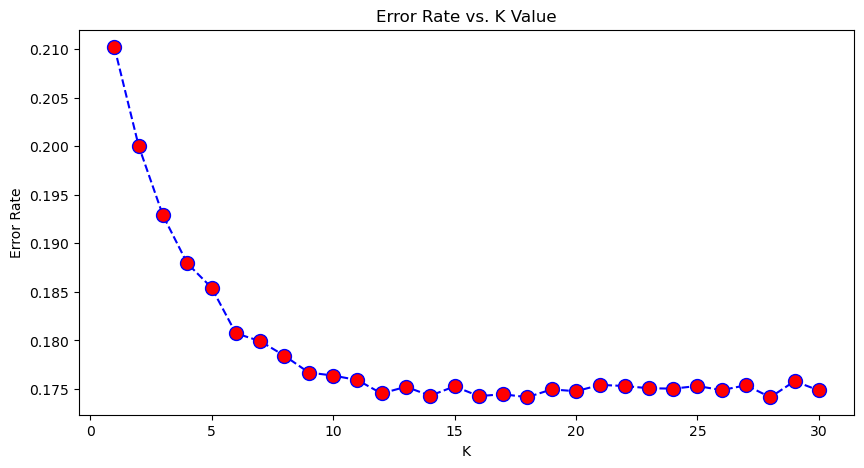

In [103]:
plt.figure(figsize=(10,5))
plt.plot(range(1,31),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [104]:
# With Optimal value of K

knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred_train=knn.predict(x_train)


print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     18867
           1       0.73      0.57      0.64      7116

    accuracy                           0.83     25983
   macro avg       0.79      0.75      0.76     25983
weighted avg       0.82      0.83      0.82     25983

For train data
              precision    recall  f1-score   support

           0       0.86      0.93      0.90     43760
           1       0.78      0.62      0.69     16865

    accuracy                           0.85     60625
   macro avg       0.82      0.78      0.79     60625
weighted avg       0.84      0.85      0.84     60625



### 4. Random Forest 

In [105]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=77)
rfc.fit(x_train,y_train)

y_pred = rfc.predict(x_test)
y_pred_train = rfc.predict(x_train)


print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     18867
           1       0.74      0.66      0.70      7116

    accuracy                           0.84     25983
   macro avg       0.81      0.79      0.80     25983
weighted avg       0.84      0.84      0.84     25983

For train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43760
           1       0.99      0.99      0.99     16865

    accuracy                           1.00     60625
   macro avg       0.99      0.99      0.99     60625
weighted avg       1.00      1.00      1.00     60625



### Important features

In [106]:
feature_scores = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

lead_time                        0.230795
adr                              0.159242
total_stay                       0.075585
arrival_date_month               0.074768
agent                            0.070682
country_1                        0.058611
is_special_request               0.052705
change_in_room_True              0.035565
is_required_parking_space        0.033002
market_segment_Online TA         0.031879
total_guests                     0.028413
deposit_type_Non Refund          0.018470
is_booking_changes               0.015984
is_previously_cancelled          0.014662
arrival_date_year_1              0.014578
customer_type_Transient          0.013964
arrival_date_year_2              0.013137
market_segment_Offline TA/TO     0.011176
hotel_Resort Hotel               0.010316
country_2                        0.009486
customer_type_Transient-Party    0.008631
market_segment_Direct            0.007155
is_repeated_guest                0.004052
market_segment_Groups            0

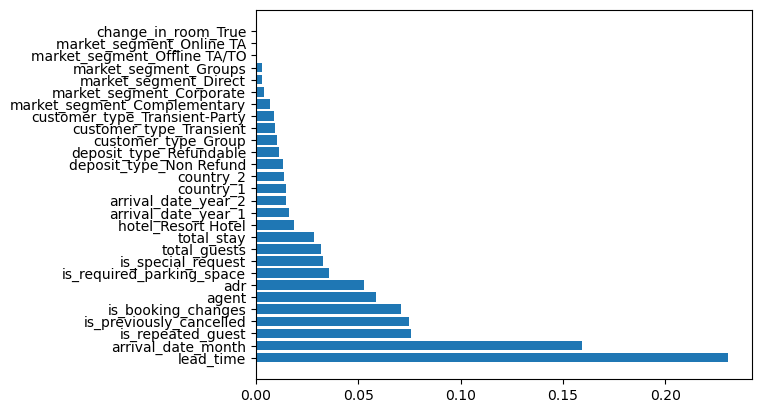

In [107]:
plt.barh(x_train.columns, feature_scores)
plt.show()

### 5. SVM

In [108]:
from sklearn.svm import SVC

svc = SVC(random_state=77)
svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)
y_pred_train = svc.predict(x_train)


print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     18867
           1       0.73      0.58      0.65      7116

    accuracy                           0.83     25983
   macro avg       0.79      0.75      0.77     25983
weighted avg       0.82      0.83      0.82     25983

For train data
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     43760
           1       0.74      0.60      0.66     16865

    accuracy                           0.83     60625
   macro avg       0.80      0.76      0.77     60625
weighted avg       0.82      0.83      0.82     60625



### 6. Naive Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

y_pred = nb.predict(x_test)
y_pred_train = nb.predict(x_train)


print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.95      0.35      0.51     18867
           1       0.36      0.95      0.52      7116

    accuracy                           0.52     25983
   macro avg       0.65      0.65      0.52     25983
weighted avg       0.79      0.52      0.51     25983

For train data
              precision    recall  f1-score   support

           0       0.95      0.35      0.51     43760
           1       0.36      0.95      0.52     16865

    accuracy                           0.52     60625
   macro avg       0.66      0.65      0.52     60625
weighted avg       0.79      0.52      0.51     60625



### 7. Gradient Boosting

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

gdb = GradientBoostingClassifier()
gdb.fit(x_train,y_train)

y_pred = gdb.predict(x_test)
y_pred_train = gdb.predict(x_train)


print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     18867
           1       0.74      0.59      0.66      7116

    accuracy                           0.83     25983
   macro avg       0.80      0.76      0.77     25983
weighted avg       0.83      0.83      0.83     25983

For train data
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     43760
           1       0.75      0.61      0.67     16865

    accuracy                           0.83     60625
   macro avg       0.80      0.76      0.78     60625
weighted avg       0.83      0.83      0.83     60625



### 8. AdaBoost

In [111]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)

y_pred = adb.predict(x_test)
y_pred_train = adb.predict(x_train)


print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))


For test data
              precision    recall  f1-score   support

           0       0.84      0.91      0.88     18867
           1       0.70      0.54      0.61      7116

    accuracy                           0.81     25983
   macro avg       0.77      0.73      0.74     25983
weighted avg       0.80      0.81      0.80     25983

For train data
              precision    recall  f1-score   support

           0       0.84      0.91      0.88     43760
           1       0.71      0.55      0.62     16865

    accuracy                           0.81     60625
   macro avg       0.78      0.73      0.75     60625
weighted avg       0.81      0.81      0.81     60625



### 9. Ridge Classifier

In [112]:
from sklearn.linear_model import RidgeClassifier

rc = RidgeClassifier()
rc.fit(x_train,y_train)

y_pred = rc.predict(x_test)
y_pred_train = rc.predict(x_train)


print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))


For test data
              precision    recall  f1-score   support

           0       0.80      0.94      0.87     18867
           1       0.71      0.38      0.49      7116

    accuracy                           0.79     25983
   macro avg       0.76      0.66      0.68     25983
weighted avg       0.78      0.79      0.76     25983

For train data
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     43760
           1       0.72      0.39      0.51     16865

    accuracy                           0.79     60625
   macro avg       0.76      0.67      0.69     60625
weighted avg       0.78      0.79      0.76     60625



### 10. XGBoost

In [113]:
from xgboost import XGBClassifier

xgb= XGBClassifier()
xgb.fit(x_train,y_train)

y_pred = xgb.predict(x_test)
y_pred_train = xgb.predict(x_train)


print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))


For test data
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     18867
           1       0.75      0.67      0.71      7116

    accuracy                           0.85     25983
   macro avg       0.81      0.79      0.80     25983
weighted avg       0.84      0.85      0.85     25983

For train data
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     43760
           1       0.80      0.72      0.76     16865

    accuracy                           0.87     60625
   macro avg       0.85      0.83      0.83     60625
weighted avg       0.87      0.87      0.87     60625



## Cross - Validation on each model

In [114]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [115]:
# Function to find out mean of cross-validation scores

def cv(model):
    scores = cross_val_score(model, x_train, y_train, cv=10)
    
    return scores.mean()

In [116]:
# 1. Logistic Regression

logreg = LogisticRegression(random_state = 11).fit(x_train, y_train)
cv(logreg)

0.7958927821168177

In [117]:
# 2. Decision Tree

dt = DecisionTreeClassifier(random_state = 11).fit(x_train, y_train)
cv(dt)

0.7965358811115205

In [118]:
# 3. KNN

knn = KNeighborsClassifier().fit(x_train, y_train)
cv(knn)

0.8130142603074623

In [119]:
# KNN with optimal value of K

knn = KNeighborsClassifier(n_neighbors = 12).fit(x_train, y_train)
cv(knn)

0.8201401532669751

In [120]:
# 4. Random Forest

rfc = RandomForestClassifier().fit(x_train, y_train)
cv(rfc)

0.8422266765333729

In [121]:
# 5. SVM

svc = SVC().fit(x_train, y_train)
cv(svc)

0.8243464436133673

In [122]:
# 6. Naive Bayes

nb = GaussianNB().fit(x_train, y_train)
cv(nb)

0.517459551101861

In [123]:
# 7. Gradient boosting

gdb = GradientBoostingClassifier().fit(x_train, y_train)
cv(gdb)

0.8330062470095015

In [124]:
# 8. AdaBoost

adb = AdaBoostClassifier().fit(x_train, y_train)
cv(adb)

0.813344363997666

In [125]:
# 9. Ridge Classifier

rc = RidgeClassifier().fit(x_train, y_train)
cv(rc)

0.7874804082047768

In [126]:
# 10. XGBoost

xgb = XGBClassifier().fit(x_train, y_train)
cv(xgb)

0.8474887213348155

In [127]:
### Best-Performing Models = Random Forest, Gradient Boosting, XG Boost

# Hyper-Parameter tuning on best performing models

In [128]:
# Function to find out best parameters using Grid Search CV

def classifier(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring = "accuracy")
    grid_search.fit(x_train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    

## 1. Random Forest 

In [129]:
# Testing hyper parameters

param_grid = {'max_depth':[30, 50, 80], 'criterion':['entropy', 'gini'],
             'max_leaf_nodes':[500, 1000, 1200],'min_samples_split':[8,10,12,14,16]}
rf = RandomForestClassifier()
classifier(rf, param_grid)

Best parameters: {'criterion': 'gini', 'max_depth': 70, 'max_leaf_nodes': 1400, 'min_samples_split': 14}
Best score: 0.8479341216141763


In [131]:
from sklearn.metrics import precision_score, recall_score

In [132]:
rfc = RandomForestClassifier(max_depth = 50, max_leaf_nodes= 1200, criterion = 'entropy', min_samples_split=12, 
                             random_state=77)
# fitting
rfc.fit(x_train,y_train)

# predicting
y_pred = rfc.predict(x_test)
y_pred_train = rfc.predict(x_train)

# results
print('For test data:')
print(classification_report(y_test,y_pred))
print('For train data:')
print(classification_report(y_train,y_pred_train))

# Training accuracy
print(f'Training accuracy = {accuracy_score(y_train, y_pred_train)}')
# Testing accuracy
print(f'Testing accuracy = {accuracy_score(y_test, y_pred)}')
# Testing precision
print(f'Testing precision = {precision_score(y_test, y_pred)}')
# Testing recall
print(f'Testing recall = {recall_score(y_test, y_pred)}')

For test data:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     18867
           1       0.77      0.63      0.69      7116

    accuracy                           0.85     25983
   macro avg       0.82      0.78      0.79     25983
weighted avg       0.84      0.85      0.84     25983

For train data:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     43760
           1       0.82      0.68      0.75     16865

    accuracy                           0.87     60625
   macro avg       0.85      0.81      0.83     60625
weighted avg       0.87      0.87      0.87     60625

Training accuracy = 0.8702020618556701
Testing accuracy = 0.845899241811954
Testing precision = 0.7676298589611283
Testing recall = 0.6271781899943789


## 2. XGBoost

In [133]:
# Testing hyper parameters

param_grid = {'gamma':[i/10.0 for i in range(10,20,1)],
 'min_child_weight': [7],
             'max_depth' : [11]}

xgb = XGBClassifier()
classifier(xgb, param_grid)

Best parameters: {'gamma': 1.9, 'max_depth': 11, 'min_child_weight': 7}
Best score: 0.847703109432777


In [134]:
from xgboost import XGBClassifier

xgb= XGBClassifier(max_depth = 11, min_child_weight = 7, gamma = 1.9, random_state = 11)
xgb.fit(x_train,y_train)

y_pred = xgb.predict(x_test)
y_pred_train = xgb.predict(x_train)


print('For test data:')
print(classification_report(y_test,y_pred))
print('For train data:')
print(classification_report(y_train,y_pred_train))


# Training accuracy
print(f'Training accuracy = {accuracy_score(y_train, y_pred_train)}')
# Testing accuracy
print(f'Testing accuracy = {accuracy_score(y_test, y_pred)}')
# Testing precision
print(f'Testing precision = {precision_score(y_test, y_pred)}')
# Testing recall
print(f'Testing recall = {recall_score(y_test, y_pred)}')

For test data:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     18867
           1       0.74      0.69      0.71      7116

    accuracy                           0.85     25983
   macro avg       0.81      0.80      0.81     25983
weighted avg       0.85      0.85      0.85     25983

For train data:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     43760
           1       0.84      0.78      0.81     16865

    accuracy                           0.90     60625
   macro avg       0.88      0.86      0.87     60625
weighted avg       0.90      0.90      0.90     60625

Training accuracy = 0.8966268041237113
Testing accuracy = 0.8493245583650849
Testing precision = 0.7437185929648241
Testing recall = 0.6863406408094435


In [135]:
xgb= XGBClassifier(max_depth = 15, min_child_weight = 7, gamma = 1.9, learning_rate =0.1, subsample= 0.8, 
                   random_state = 11)
xgb.fit(x_train,y_train)

y_pred = xgb.predict(x_test)
y_pred_train = xgb.predict(x_train)


print('For test data:')
print(classification_report(y_test,y_pred))
print('For train data:')
print(classification_report(y_train,y_pred_train))


# Training accuracy
print(f'Training accuracy = {accuracy_score(y_train, y_pred_train)}')
# Testing accuracy
print(f'Testing accuracy = {accuracy_score(y_test, y_pred)}')
# Testing precision
print(f'Testing precision = {precision_score(y_test, y_pred)}')
# Testing recall
print(f'Testing recall = {recall_score(y_test, y_pred)}')

For test data:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     18867
           1       0.75      0.68      0.71      7116

    accuracy                           0.85     25983
   macro avg       0.82      0.80      0.81     25983
weighted avg       0.85      0.85      0.85     25983

For train data:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     43760
           1       0.83      0.76      0.79     16865

    accuracy                           0.89     60625
   macro avg       0.87      0.85      0.86     60625
weighted avg       0.89      0.89      0.89     60625

Training accuracy = 0.8890886597938145
Testing accuracy = 0.8497094253935266
Testing precision = 0.7479536679536679
Testing recall = 0.6805789769533446


## 3. Gradient Boosting

In [136]:
param_grid = {'n_estimators' : range(140,151,10)}

gdb = GradientBoostingClassifier()
classifier(gdb, param_grid)

Best parameters: {'n_estimators': 150}
Best score: 0.8373773987450477


In [137]:
param_grid = {'n_estimators' : [150],'max_depth':range(9,10,1)}

gdb = GradientBoostingClassifier()
classifier(gdb, param_grid)

Best parameters: {'max_depth': 9, 'n_estimators': 150}
Best score: 0.8477360964029238


In [138]:
param_grid = {'n_estimators' : [150],'max_depth':[9], 'min_samples_split' : [80,100,120,140]}

gdb = GradientBoostingClassifier()
classifier(gdb, param_grid)

Best parameters: {'max_depth': 9, 'min_samples_split': 100, 'n_estimators': 150}
Best score: 0.8498639545957374


In [139]:
from sklearn.ensemble import GradientBoostingClassifier

gdb = GradientBoostingClassifier(max_depth= 9, min_samples_split= 100, n_estimators= 200)
gdb.fit(x_train,y_train)

y_pred = gdb.predict(x_test)
y_pred_train = gdb.predict(x_train)


print('For test data:')
print(classification_report(y_test,y_pred))
print('For train data:')
print(classification_report(y_train,y_pred_train))


# Training accuracy
print(f'Training accuracy = {accuracy_score(y_train, y_pred_train)}')
# Testing accuracy
print(f'Testing accuracy = {accuracy_score(y_test, y_pred)}')
# Testing precision
print(f'Testing precision = {precision_score(y_test, y_pred)}')
# Testing recall
print(f'Testing recall = {recall_score(y_test, y_pred)}')

For test data:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     18867
           1       0.75      0.68      0.71      7116

    accuracy                           0.85     25983
   macro avg       0.81      0.80      0.80     25983
weighted avg       0.85      0.85      0.85     25983

For train data:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     43760
           1       0.84      0.77      0.80     16865

    accuracy                           0.89     60625
   macro avg       0.87      0.85      0.86     60625
weighted avg       0.89      0.89      0.89     60625

Training accuracy = 0.8928659793814433
Testing accuracy = 0.8488242312281107
Testing precision = 0.7469786179113728
Testing recall = 0.677487352445194


In [140]:
from sklearn.ensemble import GradientBoostingClassifier

gdb = GradientBoostingClassifier(max_depth= 9, min_samples_split= 100, n_estimators= 150, max_features='auto',
                                 random_state = 11)
gdb.fit(x_train,y_train)

y_pred = gdb.predict(x_test)
y_pred_train = gdb.predict(x_train)


print('For test data:')
print(classification_report(y_test,y_pred))
print('For train data:')
print(classification_report(y_train,y_pred_train))


# Training accuracy
print(f'Training accuracy = {accuracy_score(y_train, y_pred_train)}')
# Testing accuracy
print(f'Testing accuracy = {accuracy_score(y_test, y_pred)}')
# Testing precision
print(f'Testing precision = {precision_score(y_test, y_pred)}')
# Testing recall
print(f'Testing recall = {recall_score(y_test, y_pred)}')

For test data:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     18867
           1       0.75      0.68      0.71      7116

    accuracy                           0.85     25983
   macro avg       0.82      0.80      0.80     25983
weighted avg       0.85      0.85      0.85     25983

For train data:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     43760
           1       0.82      0.75      0.78     16865

    accuracy                           0.88     60625
   macro avg       0.86      0.84      0.85     60625
weighted avg       0.88      0.88      0.88     60625

Training accuracy = 0.8842721649484536
Testing accuracy = 0.8495554785821499
Testing precision = 0.7501950382274926
Testing recall = 0.6756604834176504


## Performance Comparison:

In [141]:
from tabulate import tabulate

In [142]:
table = [['Model_Name', 'Training_accuracy', 'Testing_accuracy', 'Testing_Precision', 'Testing_Recall'], 
         ['Random Forest', 0.870, 0.845, 0.767, 0.627], 
         ['XGBoost', 0.896, 0.849, 0.743, 0.686], 
         ['Gradient Boosting', 0.884, 0.849, 0.750, 0.675]]

print(tabulate(table, headers = 'firstrow', tablefmt = "fancy_grid"))

╒═══════════════════╤═════════════════════╤════════════════════╤═════════════════════╤══════════════════╕
│ Model_Name        │   Training_accuracy │   Testing_accuracy │   Testing_Precision │   Testing_Recall │
╞═══════════════════╪═════════════════════╪════════════════════╪═════════════════════╪══════════════════╡
│ Random Forest     │               0.87  │              0.845 │               0.767 │            0.627 │
├───────────────────┼─────────────────────┼────────────────────┼─────────────────────┼──────────────────┤
│ XGBoost           │               0.896 │              0.849 │               0.743 │            0.686 │
├───────────────────┼─────────────────────┼────────────────────┼─────────────────────┼──────────────────┤
│ Gradient Boosting │               0.884 │              0.849 │               0.75  │            0.675 │
╘═══════════════════╧═════════════════════╧════════════════════╧═════════════════════╧══════════════════╛


In [143]:
## With 85% accuracy, algorithms are able to classify data points correctly.